In [ ]:
#аугментации изображений
#!pip install albumentations -q


In [1]:
!pip install -q tensorflow==2.3

ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.


In [ ]:
#!pip uninstall tensorflow -y
#!pip install tensorflow==2.3.0

In [2]:
!pip freeze > requirements.txt

In [3]:
# Импортируем библиотеки

import pandas as pd # импортируем необходимые библиотеки
import numpy as np
import re
import random
import os
import sys
import PIL
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import ExtraTreeRegressor
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from catboost import CatBoostRegressor

from tqdm import tqdm
from tqdm.notebook import tqdm

from itertools import combinations
from scipy.stats import ttest_ind


# # keras
import tensorflow as tf
import tensorflow.keras.layers as L
#from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#import albumentations
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
#from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models #as M
#import tensorflow.keras.layers as L
import tensorflow.keras.backend #as K
from tensorflow.keras import optimizers

import nltk
from nltk.corpus import stopwords

# plt
import matplotlib.pyplot as plt
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#DATA_PATH = "/content/drive/My Drive/cars2/"
#PATH = "/content/"  # рабочая директория

In [ ]:
#from tensorflow.keras import optimizers

In [4]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
from glob import iglob
from keras.applications import InceptionV3
#from keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense ,LeakyReLU

Using TensorFlow backend.


In [5]:
from collections import Counter
from keras.applications import VGG16
# Confusion Matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report
import itertools 

In [6]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)

Python       : 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
Numpy        : 1.18.1
Tensorflow   : 2.3.0


In [7]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
#np.random.seed(RANDOM_SEED)

In [ ]:
# Загрузим данные, в том числе предобработанный датасет

#DATA_DIR = '../input/sf-dst-car-price-prediction-part2/'
#train1 = pd.read_csv(DATA_DIR + 'train.csv')
#test = pd.read_csv(DATA_DIR + 'test.csv')
#sample_submission = pd.read_csv(DATA_DIR + 'sample_submission.csv')
#train = pd.read_csv('../input/edatrain/train_batmobil7.csv')

In [8]:
train_path = "/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
test_path = "/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"

In [9]:
train_path

'/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

In [61]:
# ResNet50 image size
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
IMG_SIZE             = 250 # какого размера подаем изображения в сеть 224
IMG_CHANNELS         = 3   # у RGB 3 канала
input_shape          = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)
# Keras settings
BATCH_SIZE = 64
VAL_BATCH_SIZE = 8
EPOCHS = 5
LR = 0.0001

**Testing paths and images **



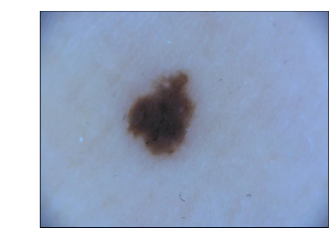

In [11]:
img = PIL.Image.open(train_path + "nevus/ISIC_0000041.jpg") # load_img(train_path + "nevus/ISIC_0000041.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


**convert images to array** 


**show to shape** 

In [12]:
x = img_to_array(img)
print(x.shape)

(1129, 1504, 3)


In [15]:
x

array([[[255., 255., 236.],
        [220., 223., 206.],
        [255., 255., 248.],
        ...,
        [255., 255., 250.],
        [223., 219., 207.],
        [255., 255., 239.]],

       [[230., 233., 214.],
        [ 34.,  36.,  23.],
        [  5.,   7.,   2.],
        ...,
        [  7.,   3.,   2.],
        [ 36.,  32.,  23.],
        [233., 230., 215.]],

       [[255., 255., 244.],
        [  0.,   2.,   0.],
        [  0.,   1.,   2.],
        ...,
        [  1.,   0.,   4.],
        [  3.,   0.,   0.],
        [255., 255., 248.]],

       ...,

       [[251., 245., 245.],
        [  3.,   0.,   0.],
        [  1.,   0.,   0.],
        ...,
        [  0.,   1.,   0.],
        [  0.,   1.,   0.],
        [248., 250., 247.]],

       [[255., 254., 250.],
        [  9.,   4.,   1.],
        [  3.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  3.,   4.,   0.],
        [255., 255., 250.]],

       [[255., 254., 250.],
        [255., 254., 250.],
        [255., 2


**Using the glob function, we learn how many different folders there are in the dataset.**

In [13]:

className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  9


In [14]:
className

['/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma',
 '/kaggle/input/skin-cancer9-classesisic/

In [59]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 60,
    brightness_range = [0.5, 1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2, # set validation split
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=[0.75,1.25],
    fill_mode='reflect')

       
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [60]:

# Завернем наши данные в генератор:

train_generator = train_datagen.flow_from_directory(
    train_path,      # директория где расположены папки с картинками 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, seed=RANDOM_SEED,
    subset='training') # set as training data

test_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, seed=RANDOM_SEED,
    subset='validation') # set as validation data



Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [ ]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=42,
    image_size= (IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE

)

In [ ]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=42,
    image_size= (IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

In [ ]:
#Распределение данных

In [17]:
def percentage_value(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_dataset_description(path, title):
    classes = []
    for filename in iglob(os.path.join(path, "**","*.jpg")):
        classes.append(os.path.split(os.path.split(filename)[0])[-1])

    classes_cnt = Counter(classes)
    values = list(classes_cnt.values())
    labels = list(classes_cnt.keys())

    plt.figure(figsize=(8,8))
    plt.pie(values, labels=labels, autopct=lambda pct: percentage_value(pct, values), 
            shadow=True, startangle=140)

    plt.title(title)    
    plt.show()

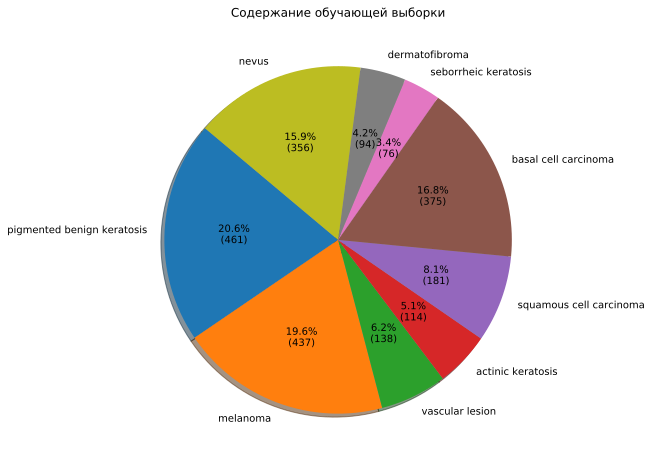

In [18]:
plot_dataset_description(os.path.join(train_path), "Содержание обучающей выборки")

In [ ]:
plot_dataset_description(os.path.join(test_path), "Содержание тестовой выборки")

In [ ]:
#model = Sequential()
#model.add(InceptionV3(include_top=False, weights='imagenet',input_shape=(3,299,299)))
#model.add(Flatten(input_shape=(3,299,299)[1:]))
#model.add(Dense(32))
#model.add(LeakyReLU(0.001))
#model.add(Dense(16))
#model.add(LeakyReLU(0.001))
#model.add(Dense(numberOfClass, activation='softmax'))
#model.layers[0].trainable = False1129, 1504, 3)

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
#model.summary()

In [ ]:
numberOfClass

In [ ]:
## Defining Cnn
model = tf.keras.models.Sequential([
  L.BatchNormalization(),
  L.Conv2D(32, 3, activation='relu'),
  L.MaxPooling2D(),
  L.Conv2D(64, 3, activation='relu'),
  L.MaxPooling2D(),
  L.Conv2D(128, 3, activation='relu'),
  L.MaxPooling2D(),
  L.Flatten(),
  L.Dense(256, activation='relu'),
  L.Dense(numberOfClass, activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('best_model.hdf5' , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
callbacks_list = [checkpoint]

In [ ]:
## lets train our CNN
%%time
history = model.fit(training_ds,validation_data= validation_ds,epochs = 5)

In [ ]:
vgg_model = Xception(weights='imagenet', include_top=False, input_shape = input_shape)

In [ ]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = False

In [ ]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_model)
 
# Add new layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass, activation='softmax'))


In [ ]:
model

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
checkpoint = ModelCheckpoint('best_model.hdf5' , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
callbacks_list = [checkpoint]

In [ ]:
%%time
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=test_generator,
        validation_steps=test_generator.samples//test_generator.batch_size,
        callbacks = callbacks_list)

In [31]:
 #Часть 3
#from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [67]:
Con = Conv2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu')

In [83]:
Con

In [75]:
# Initializarea retelei neurale convolutionale
model = tensorflow.keras.Sequential()

# Convolution Step 1
model.add(Con)

# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())

# Convolution Step 2
model.add(Conv2D(64, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution Step 3
model.add(Conv2D(256, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())

# Convolution Step 4
model.add(Conv2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())

# Convolution Step 5
model.add(Conv2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())

# Flattening Step
model.add(Flatten())

# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 38, activation = 'softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 17, 17, 64)        743488    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 384)       

In [55]:
train_generator

NameError: name 'train_generator' is not defined

In [76]:
print("Straturi:")
for i, layer in enumerate(model.layers[:30]):
    print(i, layer.name)
    layer.trainable = False

Straturi:
0 conv2d_8
1 max_pooling2d_10
2 batch_normalization_21
3 conv2d_13
4 max_pooling2d_11
5 batch_normalization_22
6 conv2d_14
7 batch_normalization_23
8 conv2d_15
9 batch_normalization_24
10 conv2d_16
11 max_pooling2d_12
12 batch_normalization_25
13 flatten_2
14 dense_8
15 dropout_6
16 batch_normalization_26
17 dense_9
18 dropout_7
19 batch_normalization_27
20 dense_10
21 dropout_8
22 batch_normalization_28
23 dense_11


In [77]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 17, 17, 64)        743488    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 384)       

In [71]:
model.compile(optimizer=optimizers.SGD(lr=0.00, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

In [45]:
train_data = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')
valid_data = ImageDataGenerator(rescale=1./255)

batch_size = 128



Found 1795 images belonging to 9 classes.
Found 0 images belonging to 9 classes.


In [46]:
training_set = train_data.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 subset='training')

valid_set = train_data.flow_from_directory(train_path,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            subset='validation')

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [47]:
clase_plante = training_set.class_indices
print(clase_plante)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


In [63]:
print("Afisarea claselor: ")
clase = list(clase_plante.keys())
print(clase)

Afisarea claselor: 
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [64]:
train_num = training_set.samples
valid_num = valid_set.samples

In [79]:
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]


In [81]:
train_generator.samples

1795

In [82]:
%%time
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples,
        epochs=EPOCHS,
        validation_data=test_generator,
        validation_steps=test_generator.samples,
        callbacks = callbacks_list)

Epoch 1/5


InvalidArgumentError:  Incompatible shapes: [64] vs. [256]
	 [[node Equal (defined at <timed exec>:7) ]] [Op:__inference_train_function_9550]

Function call stack:
train_function


In [56]:
%%time

history = model.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         epochs=5,
                         validation_data=valid_set,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)
#salvarea modelului


Epoch 1/5


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[128,38] labels_size=[128,9]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <timed exec>:6) ]] [Op:__inference_train_function_2842]

Function call stack:
train_function


In [54]:
filepath="AlexNetModel.hdf5"
model.save(filepath)

In [ ]:
# сохраним итоговую сеть и подгрузим лучшую итерацию в обучении (best_model)
model.save('../working/model_last.hdf5')
model.load_weights('best_model.hdf5')

In [ ]:
history.history['acc']

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# Confugn matrix

In [ ]:
%%time
Y_pred = model.predict_generator(test_generator,verbose=1)  #, steps=test_generator.samples//test_generator.batch_size)

In [ ]:
Y_pred

In [ ]:
y_pred2 = np.argmax(Y_pred, axis=1)
y_pred2

In [ ]:
len(y_pred2)

In [ ]:
(test_generator.classes)

In [ ]:
cnf_matrix = confusion_matrix(test_generator.classes, y_pred2)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)

In [ ]:
classes = {v: k for k, v in train_generator.class_indices.items()}
print(classes)

In [ ]:
list(classes.values())

In [ ]:
plot_confusion_matrix(cnf_matrix, list(classes.values()))

In [ ]:
# классификация ответов

print(classification_report(test_generator.classes, y_pred2, target_names=list(classes.values())))

In [ ]:
# тестовая демонстрация

In [ ]:
train_path

In [ ]:
def load_image(filename):
    img = cv2.imread(os.path.join(train_path, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    return img


#def predict(image):
#    probabilities = model.predict(np.asarray([img]))[0]
#    class_idx = np.argmax(probabilities)
  #  idx = (-pr).argsort()[:3]
#    return {classes[class_idx]: probabilities[class_idx]}

In [ ]:
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = (-probabilities).argsort()[:3]
    return class_idx, probabilities[class_idx]

In [ ]:
img2=load_image('/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+'vascular lesion/ISIC_0025707.jpg')

In [ ]:
img3=np.asarray([img2])
img3

In [ ]:
pr = model.predict(img3)[0]

In [ ]:
pr[idx]

In [ ]:
#pr
class_idx1 = np.argmax(pr)


In [ ]:
np.argpartition(pr, -3)[-3:]

In [ ]:
#idx = (-pr).argsort()[:3]
idx

In [ ]:
prediction

In [ ]:
for idx, filename in enumerate(random.sample(test_generator.filenames, 3)):
    print("Источник: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("Предсказано: класс: %s, с вероятностью: %f" % (classes[prediction[0][0]], prediction[1][0]))
    print("Предсказано: класс: %s, с вероятностью: %f" % (classes[prediction[0][1]], prediction[1][1]))
    print("Предсказано: класс: %s, с вероятностью: %f" % (classes[prediction[0][2]], prediction[1][2]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [ ]:
# Ниже работающий вериант версии 2

In [ ]:
#base_model = Xception(weights='imagenet', include_top=False, input_shape = input_shape)

In [ ]:
#x = base_model.output
#x = GlobalAveragePooling2D()(x)
## let's add a fully-connected layer
#x = Dense(256, activation='relu')(x)
#x = Dropout(0.25)(x)
## and a logistic layer -- let's say we have 10 classes
#predictions = Dense(9, activation='softmax')(x)

# this is the model we will train
#model = Model(inputs=base_model.input, outputs=predictions)
#model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
#checkpoint = ModelCheckpoint('best_model.hdf5' , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
#callbacks_list = [checkpoint]

In [ ]:

#history = model.fit_generator(
#        train_generator,
#        steps_per_epoch = len(train_generator),
#        validation_data = test_generator, 
#        validation_steps = len(test_generator),
#        epochs = EPOCHS,
#        callbacks = callbacks_list
#)

In [ ]:
# сохраним итоговую сеть и подгрузим лучшую итерацию в обучении (best_model)
#model.save('../working/model_last.hdf5')
#model.load_weights('best_model.hdf5')

In [ ]:
#scores = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
 
#epochs = range(len(acc))
 
#plt.plot(epochs, acc, 'b', label='Training acc')
#plt.plot(epochs, val_acc, 'r', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()
 
#plt.figure()
 
#plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()
 
#plt.show()

**define loss and optimizer method ...**

In [ ]:
#model.compile(loss = "categorical_crossentropy",
#              optimizer = "rmsprop",
#              metrics = ["accuracy"])
#batch_size = 250

**We get various images by zooming and rotating and flipping **

In [ ]:
#train_datagen = ImageDataGenerator(rescale= 1./255,
#                   shear_range = 0.3,
#                   horizontal_flip=True,
#                   zoom_range = 0.3)

#test_datagen = ImageDataGenerator(rescale= 1./255)


#hist = model.fit_generator(
#        generator = train_generator,
#        steps_per_epoch = 5000,
#        epochs=1,
#        validation_data = test_generator,
#        validation_steps = 250)

In [ ]:
#train_generator = train_datagen.flow_from_directory(
#        train_path, 
#        target_size=(299,299),
#        batch_size = batch_size,
#        color_mode= "rgb",
#        class_mode= 'categorical')

#test_generator = test_datagen.flow_from_directory(
#        test_path, 
#        target_size=(299,299),
#        batch_size = batch_size,
##        color_mode= "rgb",
#        class_mode= 'categorical')


In [ ]:
#hist = model.fit_generator(
#        generator = train_generator,
#        steps_per_epoch = 5000,
#        epochs=1,
#        validation_data = test_generator,
#        validation_steps = 250)

**if you want to save the train weights like me, you must push to internet button in setting on right vertical menu ** 

In [ ]:
#model.save_weights("weights.h5")

accuracy= 0,20 this is mean that dataset is not corrrect separetaly pehh ;)